# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [59]:
image = plt.imread("./data/PORTADA BERLIN.png")
image

array([[[0.6862745 , 0.8745098 , 0.9529412 ],
        [0.6862745 , 0.87058824, 0.9529412 ],
        [0.6901961 , 0.88235295, 0.95686275],
        ...,
        [0.69411767, 0.8745098 , 0.9529412 ],
        [0.69411767, 0.8784314 , 0.9607843 ],
        [0.6901961 , 0.8745098 , 0.9490196 ]],

       [[0.69411767, 0.88235295, 0.95686275],
        [0.6901961 , 0.88235295, 0.95686275],
        [0.6901961 , 0.8745098 , 0.95686275],
        ...,
        [0.69411767, 0.8784314 , 0.9607843 ],
        [0.69411767, 0.8784314 , 0.95686275],
        [0.6862745 , 0.8745098 , 0.9529412 ]],

       [[0.6901961 , 0.8784314 , 0.9607843 ],
        [0.6901961 , 0.8784314 , 0.95686275],
        [0.6901961 , 0.8745098 , 0.95686275],
        ...,
        [0.6901961 , 0.8784314 , 0.95686275],
        [0.6862745 , 0.87058824, 0.94509804],
        [0.6862745 , 0.8745098 , 0.9529412 ]],

       ...,

       [[0.69411767, 0.8784314 , 0.9607843 ],
        [0.6745098 , 0.8666667 , 0.94509804],
        [0.69803923, 0

Muestra la imagen para ver que se ha cargado bien

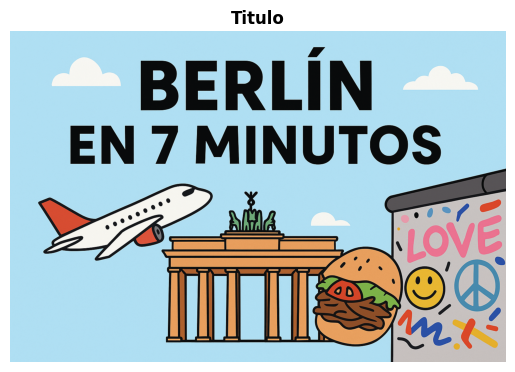

In [60]:
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

plt.title('Titulo', 
                                     fontweight ="bold")
plt.show()

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [70]:
image.shape


(1024, 1536, 3)

In [71]:
X = image.reshape(-1,image.shape[-1])
X.shape

(1572864, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [72]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=11)

In [73]:
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


In [74]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], shape=(1572864,), dtype=int32)

In [75]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.7105812 , 0.8672216 , 0.93138826],
       [0.7105812 , 0.8672216 , 0.93138826],
       [0.7105812 , 0.8672216 , 0.93138826],
       ...,
       [0.7105812 , 0.8672216 , 0.93138826],
       [0.7105812 , 0.8672216 , 0.93138826],
       [0.7105812 , 0.8672216 , 0.93138826]],
      shape=(1572864, 3), dtype=float32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

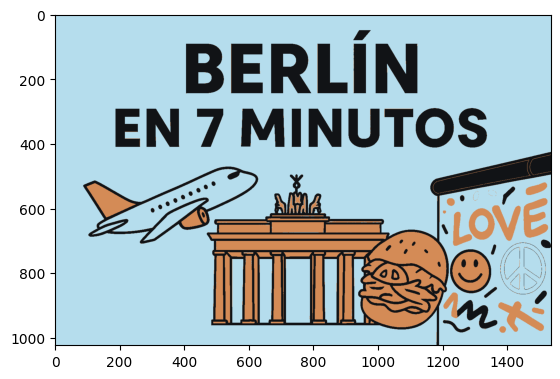

In [76]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


plt.imshow(segmented_img)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [68]:

segmented_img.shape

(1024, 1536, 3)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [69]:
plt.savefig('./data/imagen_ej.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [ ]:
def process_img(image_path:str, n_colors=256, image_save = True, image_print = True):
  image = plt.imread(image_path)
  X = image.reshape(-1,image.shape[-1])
  kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=11)
  kmeans.fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_img = segmented_img.reshape(image.shape)
  if image_save == True:
    plt.savefig('imagen_nueva.png', bbox_inches='tight')
  if image_print == True:
    plt.imshow(segmented_img)
